In [1]:
#import libraries
import pandas as pd

#libarry for feature scaling
from sklearn.preprocessing import StandardScaler

# #confusion matix
from sklearn import metrics
# to creating and reading pickle file
import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# from util import Util_class as obj_util
import importlib.util

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [3]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 120 rows and 5 Columns


In [4]:
#spliting data 
x_test = test_dataset.iloc[:,[2,3]].values
y_test = test_dataset.iloc[:,4].values  

print("x_test :",x_test.shape,"& y_test:",y_test.shape)

x_test : (120, 2) & y_test: (120,)


In [5]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_test,y_test):
    sc_x = StandardScaler()
    x_test = sc_x.fit_transform(x_test)
    return sc_x, x_test
    
sc_x, x_test = feature_scalling(x_test,y_test)

In [6]:
#load model pickle file
file1 = open('SVM.pkl', 'rb')
classifier = pickle.load(file1)



Average accuracy_score: 88.33333333333333
Average precision-recall score: 74.38
Average Roc-AUC: 88.793


Confusion Matrix:
 [[69 10]
 [ 4 37]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


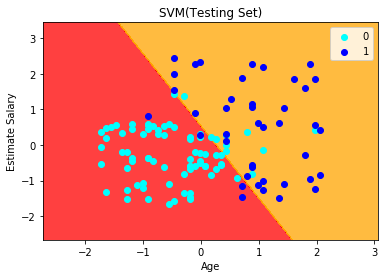

In [7]:
def final_tetsing():
    y_pre = obj_util.y_prediction(x_test, classifier)
#     print("\n\n y_prediction:",y_pre)
    
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_test)
    
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    cm = obj_util.confusion_matrix(y_test, y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, y_pre))
    obj_util.visualization(x_test,y_test, classifier, "SVM(Testing Set)", 
                           "Age", "Estimate Salary")
    
# call function
final_tetsing()

In [9]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
from sklearn.metrics import roc_curve, auc

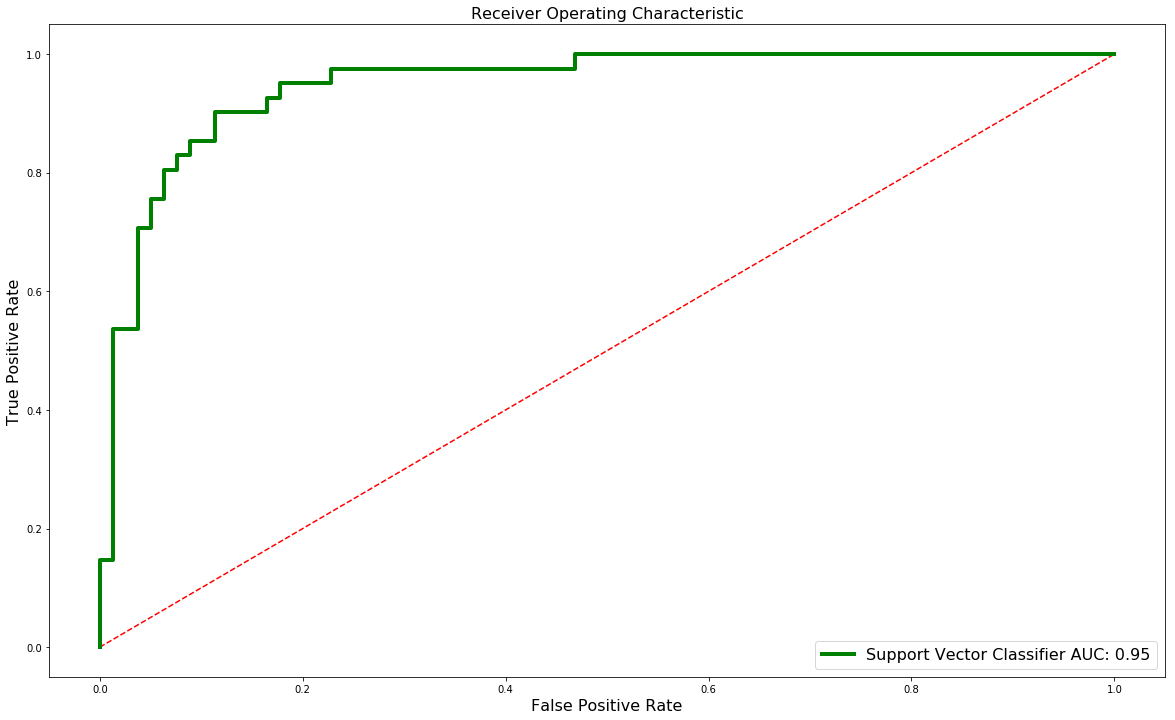

In [10]:
# ROC(Receive operator Characteristic) Curve
def visualizationROC(x_train,y_train,classifier):
    #figure size as 20x12 and create a base line from (0,0) to (1,1)
    # The value r-- indicates that the colour of the line is red 
    # and it is a dashed line ( — — — — — — — — — — — — — ).
    plt.figure(figsize = (20, 12))
    # Random Model
    plt.plot([0,1], [0,1], 'r--')

    #Calculate probabilities and determine TPR and FPR
#         probs = classifier.predict(x_train)
    probs = classifier.predict_proba(x_train)
    # Reading probability of second class (Salary >= $200K)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, probs)
    roc_auc = auc(fpr, tpr)

    label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)
    plt.show()


visualizationROC(x_test,y_test,classifier) 


 Accuracy Rate for Support Vector Classifier: 0.8962642790984872
class_1_observed 97.5609756097561


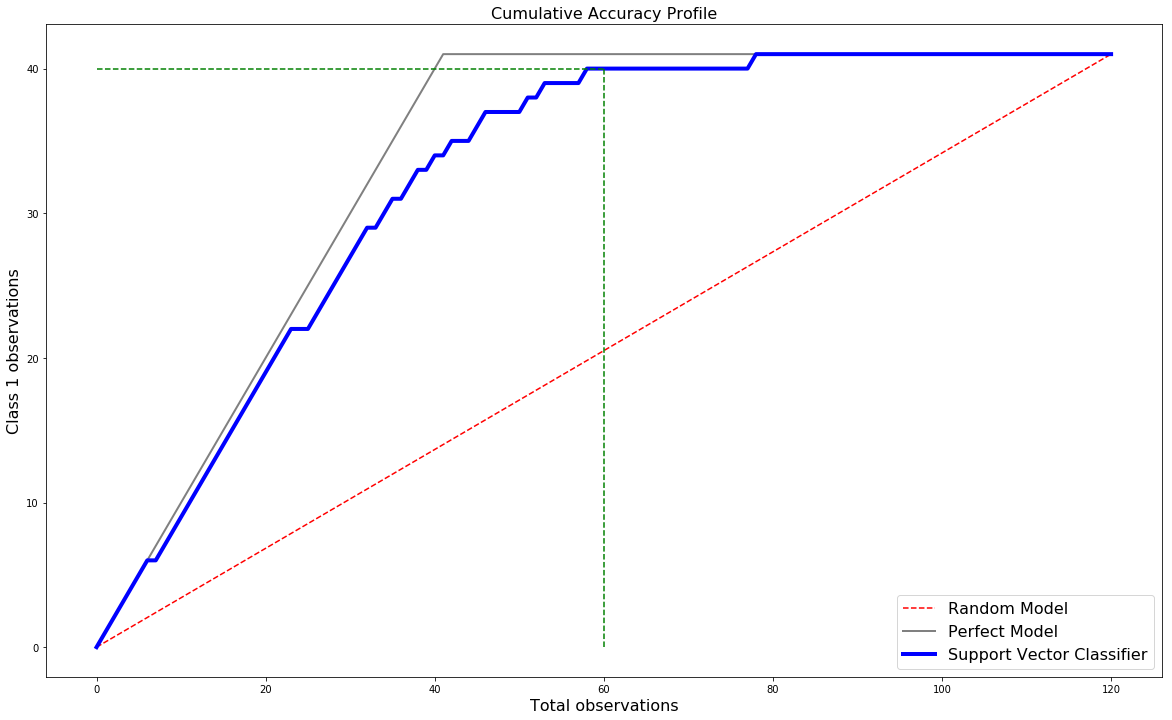

In [12]:
# CAP(Commulative Accuracy profile) Curve
"""The CAP Curve tries to analyse how to effectively identify all data points 
of a given class using minimum number of tries"""

def visualizationCAP(x_train,y_train,classifier):
    total = len(y_train)
    ## 168
    class_1_count = np.sum(y_train)
    ## 70
    class_0_count = total - class_1_count
    ## 98
    plt.figure(figsize = (20, 12))

    #Random Model
    plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

    #Perfect Model
    plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

    #Trained Model (Support Vector Classifier)
    probs = classifier.predict_proba(x_train)

    probs = probs[:, 1]
    model_y = [y for _, y in sorted(zip(probs, y_train), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)

    plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier', linewidth = 4)
    # Plot information
    plt.xlabel('Total observations', fontsize = 16)
    plt.ylabel('Class 1 observations', fontsize = 16)
    plt.title('Cumulative Accuracy Profile', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)

    # Area under Random Model
    a = auc([0, total], [0, class_1_count])
    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a
    print("\n Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))

    """CAP Analysis using Plot
    Another method to analyse the CAP Curve involves reading the plot we generated above"""
    # Point where vertical line will cut trained model
    index = int((50*total / 100))

    ## 50% Verticcal line from x-axis
    plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

    ## Horizontal line to y-axis from prediction model
    plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

    class_1_observed = y_values[index] * 100 / max(y_values)
    print("class_1_observed", class_1_observed)
    
visualizationCAP(x_test,y_test,classifier)